In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv("data/crypto_data.csv")
df

,Date,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
0,09-11-17,1.99077,7143.580078,1.00818,320.884003
1,10-11-17,1.79684,6618.140137,1.00601,299.252991
2,11-11-17,1.67047,6357.600098,1.00899,314.681000
3,12-11-17,1.51969,5950.069824,1.01247,307.907990
4,13-11-17,1.68662,6559.490234,1.00935,316.716003
...,...,...,...,...,...
1748,23-08-22,299.03000,21528.090000,1.00000,1662.770000
1749,24-08-22,296.45000,21395.020000,1.00000,1657.060000
1750,25-08-22,301.58000,21600.900000,1.00010,1696.460000
1751,26-08-22,279.60000,20260.020000,1.00000,1507.780000


In [10]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index(keys=["Date"], inplace=True)
df.sort_index(inplace=True)
df

C:\Users\spase\AppData\Local\Temp\ipykernel_18536\4085876917.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Close (BNB),Close (BTC),Close (USDT),Close (ETH)
Date,,,,
2017-01-12,2.070230,10975.59961,1.009780,466.540009
2017-02-12,2.084160,11074.59961,0.999654,463.449005
2017-03-12,2.227250,11323.20020,1.000660,465.852997
2017-04-12,2.491680,11657.20020,1.003670,470.204010
2017-05-12,2.595300,11916.70020,1.001970,463.281006
...,...,...,...,...
2022-12-04,413.873932,40127.18359,1.000435,3030.376465
2022-12-05,269.407257,29047.75195,0.997609,1961.701538
2022-12-06,255.950882,26762.64844,0.999080,1445.216553


In [11]:
df.isnull().sum()

Close (BNB)     0
Close (BTC)     0
Close (USDT)    0
Close (ETH)     0
dtype: int64

<Axes: >

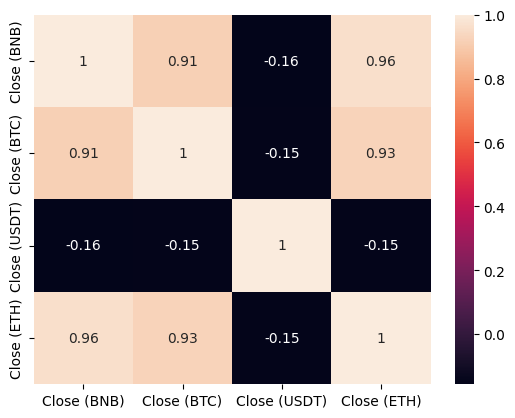

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
features = ['Close (BNB)', 'Close (BTC)', 'Close (ETH)']
target = 'Close (USDT)'

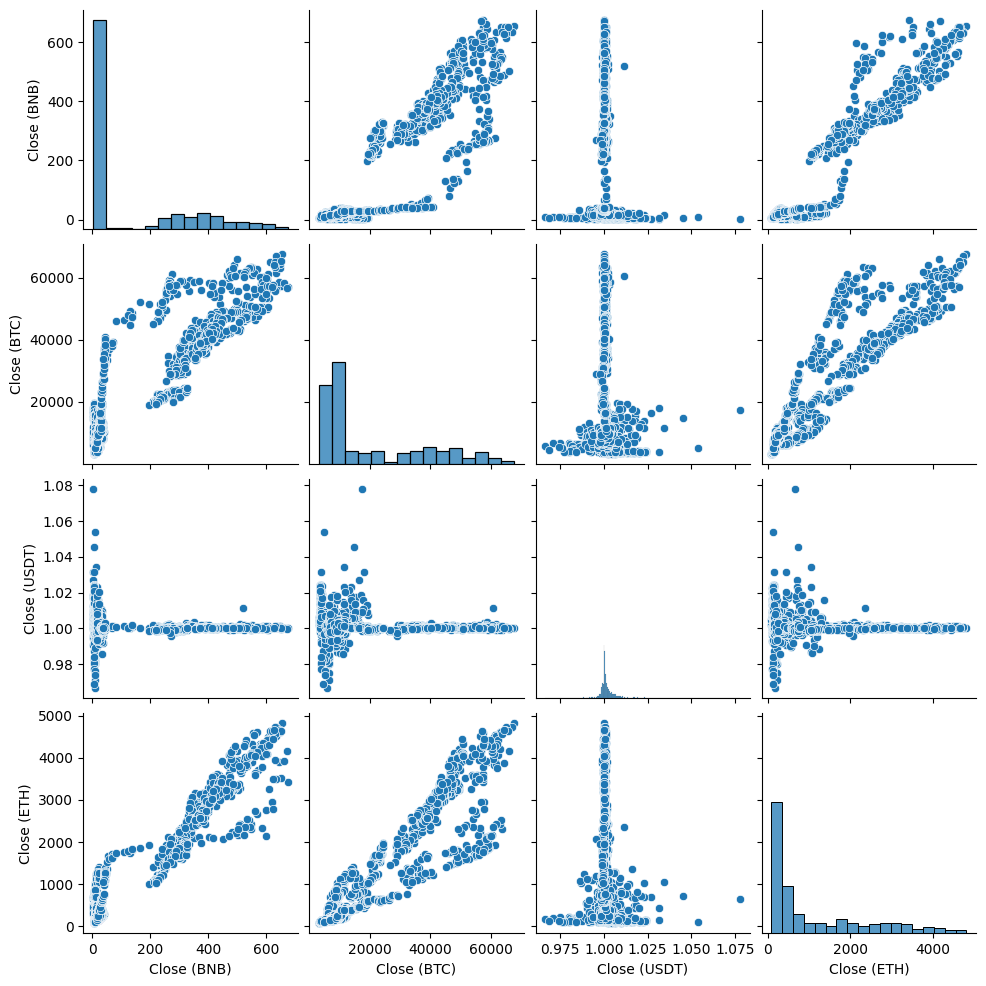

In [14]:
sns.pairplot(df)

In [15]:
lags = range(3, 0, -1)
list(lags)

[3, 2, 1]

In [16]:
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df

,Close (BNB),Close (BTC),Close (USDT),Close (ETH),Close (BNB)_3,Close (BTC)_3,Close (ETH)_3,Close (USDT)_3,Close (BNB)_2,Close (BTC)_2,Close (ETH)_2,Close (USDT)_2,Close (BNB)_1,Close (BTC)_1,Close (ETH)_1,Close (USDT)_1
Date,,,,,,,,,,,,,,,,
2017-01-12,2.070230,10975.59961,1.009780,466.540009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-12,2.084160,11074.59961,0.999654,463.449005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.070230,10975.59961,466.540009,1.009780
2017-03-12,2.227250,11323.20020,1.000660,465.852997,NaN,NaN,NaN,NaN,2.070230,10975.59961,466.540009,1.009780,2.084160,11074.59961,463.449005,0.999654
2017-04-12,2.491680,11657.20020,1.003670,470.204010,2.070230,10975.59961,466.540009,1.009780,2.084160,11074.59961,463.449005,0.999654,2.227250,11323.20020,465.852997,1.000660
2017-05-12,2.595300,11916.70020,1.001970,463.281006,2.084160,11074.59961,463.449005,0.999654,2.227250,11323.20020,465.852997,1.000660,2.491680,11657.20020,470.204010,1.003670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,413.873932,40127.18359,1.000435,3030.376465,487.007416,43949.10156,3372.258301,1.000290,403.389740,42244.46875,2917.362793,1.000601,372.730377,38904.01172,2574.754150,1.000081
2022-12-05,269.407257,29047.75195,0.997609,1961.701538,403.389740,42244.46875,2917.362793,1.000601,372.730377,38904.01172,2574.754150,1.000081,413.873932,40127.18359,3030.376465,1.000435
2022-12-06,255.950882,26762.64844,0.999080,1445.216553,372.730377,38904.01172,2574.754150,1.000081,413.873932,40127.18359,3030.376465,1.000435,269.407257,29047.75195,1961.701538,0.997609


In [17]:
df.drop(columns=features, inplace=True)
df.dropna(axis=0, inplace=True)
df

,Close (USDT),Close (BNB)_3,Close (BTC)_3,Close (ETH)_3,Close (USDT)_3,Close (BNB)_2,Close (BTC)_2,Close (ETH)_2,Close (USDT)_2,Close (BNB)_1,Close (BTC)_1,Close (ETH)_1,Close (USDT)_1
Date,,,,,,,,,,,,,
2017-04-12,1.003670,2.070230,10975.59961,466.540009,1.009780,2.084160,11074.59961,463.449005,0.999654,2.227250,11323.20020,465.852997,1.000660
2017-05-12,1.001970,2.084160,11074.59961,463.449005,0.999654,2.227250,11323.20020,465.852997,1.000660,2.491680,11657.20020,470.204010,1.003670
2017-06-12,1.009910,2.227250,11323.20020,465.852997,1.000660,2.491680,11657.20020,470.204010,1.003670,2.595300,11916.70020,463.281006,1.001970
2017-07-12,1.031660,2.491680,11657.20020,470.204010,1.003670,2.595300,11916.70020,463.281006,1.001970,2.587690,14291.50000,428.588013,1.009910
2017-08-12,1.017600,2.595300,11916.70020,463.281006,1.001970,2.587690,14291.50000,428.588013,1.009910,2.779950,17899.69922,434.407990,1.031660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,1.000435,487.007416,43949.10156,3372.258301,1.000290,403.389740,42244.46875,2917.362793,1.000601,372.730377,38904.01172,2574.754150,1.000081
2022-12-05,0.997609,403.389740,42244.46875,2917.362793,1.000601,372.730377,38904.01172,2574.754150,1.000081,413.873932,40127.18359,3030.376465,1.000435
2022-12-06,0.999080,372.730377,38904.01172,2574.754150,1.000081,413.873932,40127.18359,3030.376465,1.000435,269.407257,29047.75195,1961.701538,0.997609


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, y = df.drop(columns=[target]), df[target]

In [20]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [23]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [24]:
lag = 3
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1400, 3, 4)

In [25]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [26]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [91]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [92]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 3, 64)               │          17,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 3, 64)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,137 (246.63 KB)

 Trainable params: 63,137 (246.63 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [94]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 2/16
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 3/16
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 4/16
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 5/16
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 6/16
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 7/16
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0111 - 

<Axes: >

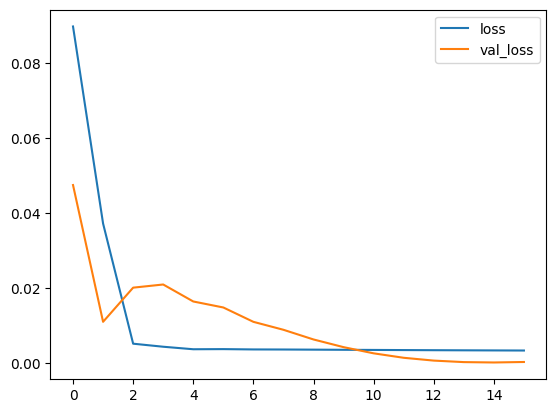

In [95]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [96]:
pred_y = model.predict(test_X)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step


In [97]:
pred_y = scaler.inverse_transform(pred_y)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(0.0018735223373958013),
 np.float64(4.286232257099062e-06),
 -9.69024035541806)

# Boosting

In [99]:
df

,Close (USDT),Close (BNB)_3,Close (BTC)_3,Close (ETH)_3,Close (USDT)_3,Close (BNB)_2,Close (BTC)_2,Close (ETH)_2,Close (USDT)_2,Close (BNB)_1,Close (BTC)_1,Close (ETH)_1,Close (USDT)_1
Date,,,,,,,,,,,,,
2017-04-12,1.003670,2.070230,10975.59961,466.540009,1.009780,2.084160,11074.59961,463.449005,0.999654,2.227250,11323.20020,465.852997,1.000660
2017-05-12,1.001970,2.084160,11074.59961,463.449005,0.999654,2.227250,11323.20020,465.852997,1.000660,2.491680,11657.20020,470.204010,1.003670
2017-06-12,1.009910,2.227250,11323.20020,465.852997,1.000660,2.491680,11657.20020,470.204010,1.003670,2.595300,11916.70020,463.281006,1.001970
2017-07-12,1.031660,2.491680,11657.20020,470.204010,1.003670,2.595300,11916.70020,463.281006,1.001970,2.587690,14291.50000,428.588013,1.009910
2017-08-12,1.017600,2.595300,11916.70020,463.281006,1.001970,2.587690,14291.50000,428.588013,1.009910,2.779950,17899.69922,434.407990,1.031660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-04,1.000435,487.007416,43949.10156,3372.258301,1.000290,403.389740,42244.46875,2917.362793,1.000601,372.730377,38904.01172,2574.754150,1.000081
2022-12-05,0.997609,403.389740,42244.46875,2917.362793,1.000601,372.730377,38904.01172,2574.754150,1.000081,413.873932,40127.18359,3030.376465,1.000435
2022-12-06,0.999080,372.730377,38904.01172,2574.754150,1.000081,413.873932,40127.18359,3030.376465,1.000435,269.407257,29047.75195,1961.701538,0.997609


In [100]:
X, y = df.drop(columns=[target]), df[target]

In [101]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [102]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [103]:
lag = 3
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(1400, 3, 4)

In [104]:
from xgboost import XGBRegressor

In [144]:
regressor = XGBRegressor(n_estimators=21).fit(train_X, train_y)

In [145]:
pred_y = regressor.predict(test_X)

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(0.0004917783256312777),
 np.float64(5.461468353898738e-07),
 -0.3621382579067638)

In [147]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [148]:
grid_search = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        "n_estimators": [15, 20, 25, 30, 35, 40],
        "max_depth": [2, 3, 4, 5, 6, 7]
    },
    cv=TimeSeriesSplit(n_splits=5)
)

In [149]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [15, 20, 25, 30, 35, 40]})

In [150]:
grid_search.best_params_

{'max_depth': 2, 'n_estimators': 30}

In [151]:
regressor = XGBRegressor(n_estimators=30, max_depth=2).fit(train_X, train_y)

In [152]:
pred_y = regressor.predict(test_X)

In [153]:
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(0.0006498058243015846),
 np.float64(7.444065088096135e-07),
 -0.8566153264635092)